### **BUSI 488 / COMP 488 Data Science in the Business World**
## *Spring 2023*  
Daniel M. Ringel  
Kenan-Flagler Business School  
*The University of North Carolina at Chapel Hill*  
dmr@unc.edu  

---
## Anomaly Detection Examples for Class 02
*January 12 2023*  
Version 1.2 

----

In [9]:
# 1. Import basic libraries for this notebook
import numpy as np
import seaborn as sns
from matplotlib.cbook import boxplot_stats
import matplotlib.pyplot as plt
np.random.seed(1)

#1. Detecting Anomalies

Detecting Anomalies is critical to any business either by identifying faults or being proactive. This notebook offers 5 different approaches to identify those anomalies.

#2. Why Do We Care About Anomalies?

Detecting outliers or anomalies is one of the core problems in data mining.
* The emerging expansion and continued growth of data and the spread of IoT devices, make us rethink the way we approach anomalies and the use cases that can be built by looking at those anomalies.

* We now have smart watches and wristbands that can detect our heartbeats every few minutes. Detecting anomalies in the heartbeat data can help in predicting heart diseases.   

* Anomalies in traffic patterns can help in predicting accidents. It can also be used to identify bottlenecks in network infrastructure and traffic between servers. 

* Hence, the use cases and solution built on top of detecting anomalies are limitless.

Another reason why we need to detect anomalies is that when preparing datasets for machine learning models, it is really important to detect all the outliers and either get rid of them or analyze them to know why you had them there in the first place.

Now, let’s explore 5 common ways to detect anomalies starting with the most simple way.

#Method 1: Standard Deviation
------------------------------------------
In a data set that follows a roughly normal distribution, approximately **95%** of data should lie within two standard deviations of the mean. One way to identify outliers is to find data points that are more than some number of standard deviations above or below the mean. 

The code below generates 50,000 data points from a distribution with mean 20 and standard deviation 20. All values outside of 2.75 standard deviations from the mean of the generated data are printed.

<Axes: ylabel='Count'>

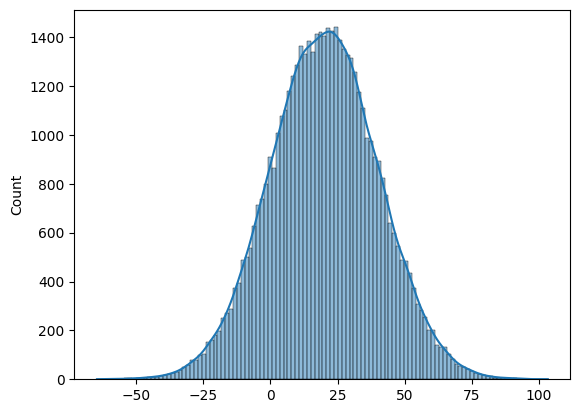

In [10]:
# multiply and add by random numbers to get some real values
random_data = np.random.randn(50000)  * 20 + 20
sns.histplot(random_data, kde=True)

In [11]:
# Function to collect outliers for one-dimensional datasets by fitting normal distribution and cutting both tails 
def find_anomalies(data, std_limit=2.75, printflag=True):
    # Default upper and lower limit is 2.75 standard deviation (BAD SMELL: was magic number)
    data_std = np.std(data)
    data_mean = np.mean(data)
    anomaly_cut_off = data_std * std_limit
    
    lower_limit = data_mean - anomaly_cut_off 
    upper_limit = data_mean + anomaly_cut_off
 # Collect outliers: BAD SMELL: returning different data than given!
    anomalies = [round(x,2) for x in data if x > upper_limit or x < lower_limit]
    if printflag: 
      print(f"Mean: {data_mean:.0f}")
      print(f"Lower Limit: {lower_limit:.2f}")
      print(f"Upper Limit: {upper_limit:.2f}")
      print(f"Number of Outliers: {len(anomalies)}")

    return anomalies

find_anomalies(random_data)

Mean: 20
Lower Limit: -34.96
Upper Limit: 75.11
Number of Outliers: 297


[-35.86,
 80.62,
 -35.65,
 99.17,
 -35.82,
 86.42,
 -41.08,
 78.35,
 76.55,
 -43.07,
 -40.32,
 88.65,
 -35.83,
 76.88,
 -41.28,
 94.8,
 77.89,
 82.7,
 84.77,
 -37.44,
 75.75,
 77.87,
 76.96,
 75.54,
 -36.03,
 76.38,
 -45.06,
 -38.29,
 77.09,
 82.64,
 80.26,
 76.44,
 -36.9,
 -39.7,
 -43.81,
 -45.21,
 -37.02,
 -38.51,
 88.09,
 79.52,
 77.82,
 82.37,
 85.97,
 82.98,
 -36.04,
 78.54,
 -45.9,
 -41.11,
 -35.21,
 100.54,
 -44.38,
 77.15,
 76.09,
 82.24,
 -37.73,
 92.27,
 -36.14,
 87.96,
 91.22,
 -53.13,
 75.98,
 -45.64,
 80.09,
 -37.29,
 91.21,
 -35.98,
 -43.47,
 82.13,
 82.91,
 -39.87,
 -46.22,
 -37.15,
 -41.96,
 -37.58,
 -36.79,
 -45.61,
 77.39,
 -38.56,
 76.87,
 76.78,
 80.52,
 -35.59,
 76.12,
 -39.67,
 -43.3,
 79.51,
 77.16,
 -42.25,
 81.59,
 77.05,
 -39.68,
 75.3,
 103.36,
 96.69,
 -40.59,
 -48.72,
 -45.18,
 81.54,
 -35.09,
 -37.36,
 -37.38,
 -37.08,
 75.41,
 -39.31,
 84.56,
 79.82,
 77.93,
 -38.65,
 -40.77,
 -44.08,
 76.86,
 -42.04,
 87.71,
 76.79,
 88.94,
 -40.52,
 -49.03,
 86.72,
 -35

# Method 2: Boxplots
----------------------------
Boxplots are a more effective way to visualize the outliers in a large data set. They rely on the concept of **Interquartile Range (IQR)**. The first quartile (Q1) is the value of which 25% of the data lies below, and the 3rd quartile (Q3) is the value at which 75% of the data lies below. IQR = Q3 - Q1.

Using these concepts, we can describe outliers as points below (Q1 − 1.5x IQR)/boxplot lower whisker or above (Q3 + 1.5x IQR)/boxplot upper whisker.

Note the less restrictive cutoffs in the below boxplot in comparison to the cutoffs found in method 1 above. The outliers found in method 1 are a subset of those found using this method.


IQR: 26.89
Upper Whisker: 73.79
Lower Whisker: -33.71
Num Outliers: 359


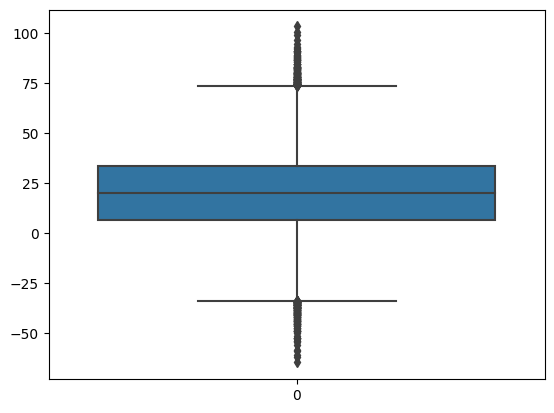

In [12]:
sns.boxplot(data=random_data)
print(f"IQR: {boxplot_stats(random_data)[0]['iqr']:.2f}")
print(f"Upper Whisker: {boxplot_stats(random_data)[0]['whishi']:.2f}")
print(f"Lower Whisker: {boxplot_stats(random_data)[0]['whislo']:.2f}")
print(f"Num Outliers: {len(boxplot_stats(random_data)[0]['fliers'])}")

<Axes: >

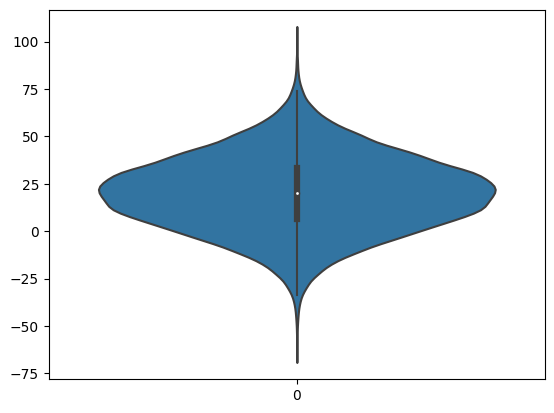

In [13]:
# To inspect the distribution of your data you can also use Violin Plots
sns.violinplot(data=random_data)

# Method 3: DBSCAN Clustering
------------------------------------------
DBSCAN is a clustering algorithm that’s used cluster data into groups. It is also used as a density-based anomaly detection method with either single or multi-dimensional data. Other clustering algorithms such as k-means and hierarchal clustering can also be used to detect outliers. DBSCAN has three important concepts:

* **Core Points**: In order to understand the concept of the core points, we need to visit some of the hyperparameters used to define DBSCAN job. First hyperparameter (HP) is min_samples. This is simply the minimum number of core points needed in order to form a cluster. second important HP is eps. eps is the maximum distance between two samples for them to be considered as in the same cluster.
* **Border Points** are in the same cluster as core points but much further away from the centre of the cluster.
* Everything else is called **Noise Points**, those are data points that do not belong to any cluster. They can be anomalous or non-anomalous and they need further investigation. Now, let’s see some code.



In [14]:
from sklearn.cluster import DBSCAN
np.random.seed(1)
random_data = np.random.randn(50000,2)  * 20 + 20

outlier_detection = DBSCAN(min_samples = 6, eps = 3)
clusters = outlier_detection.fit_predict(random_data)
list(clusters).count(-1)

302

The output of the above code is **302**. This is the total number of noisy points, which is dependent on the hyperparameters used in the model. Feel free to play with min-samples and eps and see how the number of outliers changes. SKLearn labels the noisy points as (-1). The downside with this method is that the higher the dimension, the less accurate it becomes. You also need to make a few assumptions like estimating the right value for eps which can be challenging.

Furthermore note that we would not expect a clustering algorithm to be effective with data drawn from a single normal distribution, with just one mean (why?). The code below, drawn from https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html, shows a visualization of this method on data drawn from a more appropriate source for using this method. Noise Points/Outliers are labeled with black dots.

Estimated number of clusters: 3
Estimated number of noise points: 18


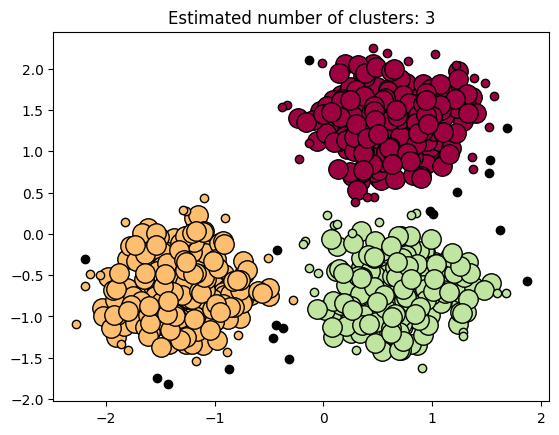

In [15]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# #############################################################################
# Plot result

# Remove black color and use it for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

#Method 4: Isolation Forest
-----------------------------------
Isolation Forest is an unsupervised learning algorithm that belongs to the ensemble decision trees family. This approach is different from all previous methods. All the previous ones were trying to find the normal region of the data then identifies anything outside of this defined region to be an outlier or anomalous.

This method works differently. It explicitly isolates anomalies instead of profiling and constructing normal points and regions by assigning a score to each data point. It takes advantage of the fact that anomalies are the minority data points and that they have attribute-values that are very different from those of normal instances. This algorithm works great with very high dimensional datasets and it proved to be a very effective way of detecting anomalies. Since this article is focusing on the implementation rather than the know-how, I will not go any further on how the algorithm works. However, the full details on how it works are covered in this [paper](https://cs.nju.edu.cn/zhouzh/zhouzh.files/publication/icdm08b.pdf).

The code below will output the predictions for each data point in an array. If the result is -1, it means that this specific data point is an outlier. If the result is 1, then it means that the data point is not an outlier.

In [16]:
from sklearn.ensemble import IsolationForest
import numpy as np
np.random.seed(1)
random_data = np.random.randn(50000,2)  * 20 + 20

clf = IsolationForest(max_samples=256, random_state = 1, contamination= 'auto')
preds = clf.fit_predict(random_data)
# print the number of points marked as outlier (-1)
print(f"Num Outliers: {np.count_nonzero(preds == -1)}")
# alternatively, print both number of outliers and non-outliers
unique, counts = np.unique(preds, return_counts=True)
print (dict(zip(unique, counts)))

Num Outliers: 10307
{-1: 10307, 1: 39693}


#Method 5: Robust Random Cut Forest
------------------------------------------------------
Random Cut Forest (RCF) algorithm is Amazon’s unsupervised algorithm for detecting anomalies. It works by associating an anomaly score as well. Low score values indicate that the data point is considered “normal.” High values indicate the presence of an anomaly in the data. The definitions of “low” and “high” depend on the application but common practice suggests that scores beyond three standard deviations from the mean score are considered anomalous. The details of the algorithm can be found in this [paper](http://proceedings.mlr.press/v48/guha16.pdf).

The great thing about this algorithm is that it works with very high dimensional data. It can also work on real-time streaming data (built in AWS Kinesis Analytics) as well as offline data.

The paper includes some performance benchmarks that show that RCF is much more accurate and faster than Isolation Forests.

A github repository with [example code](https://github.com/awslabs/amazon-sagemaker-examples/tree/master/introduction_to_amazon_algorithms/random_cut_forest) is linked.

The code and much of the text in this notebook comes from Will Badr's excellent Medium article, found at the following URL: https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623


